# Generative AI for Software Development


## Steps
### 1. Create a Database with few specified Tables (Company and Stock Ticker) and Data model using Python SQLLIte package
### 2. Add another Table with Timeseries Data generated using the LLM
### 3. Query the database and list all tables with 5 records each
### 4. Create code such that for a given a Company ticker or Id it will extract the data for that Company, and the time series data and load it into an Company object. 
### 5. Write code using Seabourne or Matplotlib to plot the time series data for a Company


In [ ]:
"""
Prompt 1
You are an expert Python developer who builds readable code. Together we will work on an application that has a database to store information, code to retrieve data from the database named "llm_demo.db", and analytics that will run on the retrieved data. First, let's create the database, which has a table for companies. The table will have three columns, the first is an id, the second the ticker for the company, the third is the name of the company. Create this, and synthesize data for 10 companies, adding that to the database.


Prompt 2
Now add another table called 'TimeSeries' that has four columns, an id for the row, the id for one of the companies, a value, and a date. Populate this with about 100 values per company, and have the dates be successive.


Prompt 3
Now can you query the database and list all tables with 5 records each


Prompt 4
Now create code that when given a company ticker or an ID that it will extract the data for that company, and the time series data and load it into an company object. This object should have fields and functions for calculating and storing high_bollinger, low_bollinger and moving_average and all three are same data type as the time series, and a grade field which is a string. For the bollinger bands and moving average create config parameters which can be updated to modify the bands in charts. Make sure you open the Db connection first and then get the data for a company.


Prompt 5
Now can you write code using Seabourne or Matplotlib to plot the time series data for a company, and use the already calculated bollinger data to overlay the high bollinger, low bollinger, and moving average on the same plot?
"""

In [ ]:
### 1. Create a Database with few specified Tables (Company and Stock Ticker) and Data model using Python SQLLIte package
### 2. Add another Table with Timeseries Data generated using the LLM
### 3. Query the database and list all tables with 5 records each
### 4. Create code such that for a given a Company ticker or Id it will extract the data for that Company, and the time series data and load it into an Company object.
### 5. Write code using Seabourne or Matplotlib to plot the time series data for a Company

In [ ]:
import sqlite3

# You are an expert Python developer who builds readable code. Together we will work on an application that has a database to store information, code to retrieve data from the database named "llm_demo.db", and analytics that will run on the retrieved data. First, let's create the database, which has a table for companies. The table will have three columns, the first is an id, the second the ticker for the company, the third is the name of the company. Create this, and synthesize data for 10 companies, adding that to the database.

# Connect to SQLite database
conn = sqlite3.connect("llm_demo.db")
cursor = conn.cursor()

# Create table for companies
cursor.execute(
    """
CREATE TABLE IF NOT EXISTS Company (
    id INTEGER PRIMARY KEY,
    ticker TEXT NOT NULL,
    name TEXT NOT NULL
)
"""
)

# Synthesize data for 10 companies
companies = [
    (1, "AAPL", "Apple Inc."),
    (2, "MSFT", "Microsoft Corporation"),
    (3, "GOOGL", "Alphabet Inc."),
    (4, "AMZN", "Amazon.com Inc."),
    (5, "TSLA", "Tesla Inc."),
    (6, "FB", "Meta Platforms Inc."),
    (7, "NVDA", "NVIDIA Corporation"),
    (8, "NFLX", "Netflix Inc."),
    (9, "ADBE", "Adobe Inc."),
    (10, "INTC", "Intel Corporation"),
]

# Insert data into the Company table
cursor.executemany(
    """
INSERT INTO Company (id, ticker, name)
VALUES (?, ?, ?)
""",
    companies,
)

# Commit the transaction and close the connection
conn.commit()
conn.close()

In [ ]:
import datetime
import random

# Now add another table called 'TimeSeries' that has four columns, an id for the row, the id for one of the companies, a value, and a date. Populate this with about 100 values per company, and have the dates be successive.
# Create table for time series data

# Reopen the SQLite database connection
conn = sqlite3.connect("llm_demo.db")
cursor = conn.cursor()

# Create table for time series data
cursor.execute(
    """
CREATE TABLE IF NOT EXISTS TimeSeries (
    id INTEGER PRIMARY KEY,
    company_id INTEGER,
    value REAL,
    date TEXT,
    FOREIGN KEY (company_id) REFERENCES Company (id)
)
"""
)

# Generate time series data
time_series_data = []
start_date = datetime.date(2023, 1, 1)
for company in companies:
    company_id = company[0]
    for i in range(100):
        date = start_date + datetime.timedelta(days=i)
        value = random.uniform(100, 500)  # Random value between 100 and 500
        time_series_data.append((None, company_id, value, date.isoformat()))

# Insert data into the TimeSeries table
cursor.executemany(
    """
INSERT INTO TimeSeries (id, company_id, value, date)
VALUES (?, ?, ?, ?)
""",
    time_series_data,
)

# Commit the transaction and close the connection
conn.commit()
conn.close()

In [ ]:
# Now can you query the database and list all tables with 5 records each
# Query the database and list all tables with 5 records each
conn = sqlite3.connect("llm_demo.db")
cursor = conn.cursor()


# Function to fetch and print 5 records from each table
def fetch_and_print_5_records(table_name):
    cursor.execute(f"SELECT * FROM {table_name} LIMIT 5")
    records = cursor.fetchall()
    print(f"Table: {table_name}")
    for record in records:
        print(record)
    print("\n")


# Get the list of tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# Fetch and print 5 records from each table
for table in tables:
    fetch_and_print_5_records(table[0])

# Close the connection
conn.close()

Table: Company
(1, 'AAPL', 'Apple Inc.')
(2, 'MSFT', 'Microsoft Corporation')
(3, 'GOOGL', 'Alphabet Inc.')
(4, 'AMZN', 'Amazon.com Inc.')
(5, 'TSLA', 'Tesla Inc.')


Table: TimeSeries
(1, 1, 224.8568906938085, '2023-01-01')
(2, 1, 299.54939127744575, '2023-01-02')
(3, 1, 171.84740729920756, '2023-01-03')
(4, 1, 125.24664493533476, '2023-01-04')
(5, 1, 423.3032621356851, '2023-01-05')




In [ ]:
import pandas as pd


# Now create code that when given a company ticker or an ID that it will extract the data for that company, and the time series data and load it into an company object. This object should have fields and functions for calculating and storing high_bollinger, low_bollinger and moving_average and all three are same data type as the time series, and a grade field which is a string. For the bollinger bands and moving average create config parameters which can be updated to modify the bands in charts. Make sure you open the Db connection first and then get the data for a company.
class Company:
    def __init__(self, company_id, ticker, name, time_series_data):
        self.company_id = company_id
        self.ticker = ticker
        self.name = name
        self.time_series_data = pd.DataFrame(
            time_series_data, columns=["id", "company_id", "value", "date"]
        )
        self.time_series_data["date"] = pd.to_datetime(self.time_series_data["date"])
        self.high_bollinger = None
        self.low_bollinger = None
        self.moving_average = None
        self.grade = None
        self.bollinger_window = 20
        self.bollinger_std_dev = 2

    def calculate_moving_average(self):
        self.moving_average = (
            self.time_series_data["value"].rolling(window=self.bollinger_window).mean()
        )

    def calculate_bollinger_bands(self):
        rolling_mean = (
            self.time_series_data["value"].rolling(window=self.bollinger_window).mean()
        )
        rolling_std = (
            self.time_series_data["value"].rolling(window=self.bollinger_window).std()
        )
        self.high_bollinger = rolling_mean + (rolling_std * self.bollinger_std_dev)
        self.low_bollinger = rolling_mean - (rolling_std * self.bollinger_std_dev)

    def update_bollinger_config(self, window, std_dev):
        self.bollinger_window = window
        self.bollinger_std_dev = std_dev
        self.calculate_moving_average()
        self.calculate_bollinger_bands()


def get_company_data(company_id=None, ticker=None):
    conn = sqlite3.connect("llm_demo.db")
    cursor = conn.cursor()

    if company_id:
        cursor.execute("SELECT * FROM Company WHERE id = ?", (company_id,))
    elif ticker:
        cursor.execute("SELECT * FROM Company WHERE ticker = ?", (ticker,))
    else:
        raise ValueError("Either company_id or ticker must be provided")

    company_record = cursor.fetchone()
    if not company_record:
        raise ValueError("Company not found")

    company_id = company_record[0]
    ticker = company_record[1]
    name = company_record[2]

    cursor.execute("SELECT * FROM TimeSeries WHERE company_id = ?", (company_id,))
    time_series_data = cursor.fetchall()

    conn.close()

    company = Company(company_id, ticker, name, time_series_data)
    company.calculate_moving_average()
    company.calculate_bollinger_bands()

    return company


# Get data for a company with ticker 'AAPL'
company = get_company_data(ticker="AAPL")
print(company.ticker)
print(company.name)
print(company.time_series_data.head())
print(company.moving_average.head())
print(company.high_bollinger.head())
print(company.low_bollinger.head())

AAPL
Apple Inc.
   id  company_id       value       date
0   1           1  224.856891 2023-01-01
1   2           1  299.549391 2023-01-02
2   3           1  171.847407 2023-01-03
3   4           1  125.246645 2023-01-04
4   5           1  423.303262 2023-01-05
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: value, dtype: float64
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: value, dtype: float64
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: value, dtype: float64


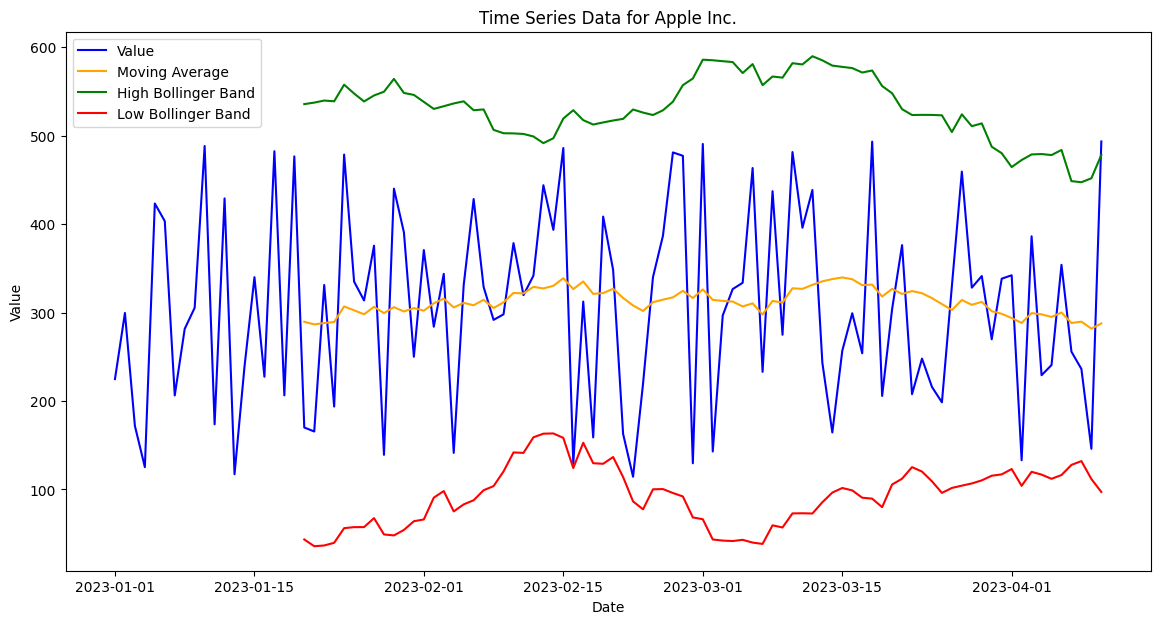

In [ ]:
# Now can you write code using Seabourne or Matplotlib to plot the time series data for a company, and use the already calculated bollinger data to overlay the high bollinger, low bollinger, and moving average on the same plot?
import matplotlib.pyplot as plt

# Plot the time series data for the company
plt.figure(figsize=(14, 7))
plt.plot(
    company.time_series_data["date"],
    company.time_series_data["value"],
    label="Value",
    color="blue",
)
plt.plot(
    company.time_series_data["date"],
    company.moving_average,
    label="Moving Average",
    color="orange",
)
plt.plot(
    company.time_series_data["date"],
    company.high_bollinger,
    label="High Bollinger Band",
    color="green",
)
plt.plot(
    company.time_series_data["date"],
    company.low_bollinger,
    label="Low Bollinger Band",
    color="red",
)

plt.title(f"Time Series Data for {company.name}")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()